In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [287]:
I1=pd.read_csv('dataset/input_withPTEAI.csv')
I2=pd.read_csv('dataset/output_withPTEAI.csv')

In [288]:
I1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Concentration (mM)       225 non-null    int64  
 1   Annealing T              225 non-null    int64  
 2   Molecular Weight         225 non-null    float64
 3   # C atom                 225 non-null    int64  
 4   # H atom                 225 non-null    int64  
 5   # Br atom                225 non-null    int64  
 6   # I atom                 225 non-null    int64  
 7   # N atom                 225 non-null    int64  
 8   # H-bond Donor           225 non-null    int64  
 9   # Rotatable Bond         225 non-null    int64  
 10  Top. Polar Surface Area  225 non-null    float64
 11  # Heavy Atom             225 non-null    int64  
 12  Complexity               225 non-null    float64
 13  Partition Coeff.         225 non-null    float64
dtypes: float64(4), int64(10)
m

In [289]:
data_wo_MAPI=I2[I2['compound']!='MAPI']

In [290]:
data_wo_MAPI

,compound,concentration_mM,annealing_T,molecular_weight,C,H,Br,I,N,Hbond_donor,...,xlogP,param1_r,param2_r,xinterp_r,max_x_r,param1_g,param2_g,xinterp_g,max_x_g,date
0,BzABr,5,100,188.068,7,10,1,0,1,1,...,1.1,1.48800,-12.0704,8.1118,175.0500,1.54680,-6.8205,4.4095,170.0500,20190530
1,BzABr,10,100,188.068,7,10,1,0,1,1,...,1.1,1.36500,-111.6000,81.7582,200.0667,1.47750,-119.0275,80.5601,210.0667,20190530
2,BzABr,15,100,188.068,7,10,1,0,1,1,...,1.1,1.44400,-189.5344,131.2565,225.0667,1.35550,-169.5730,125.1000,235.0833,20190530
3,BzAI,5,50,235.070,7,10,0,1,1,1,...,1.1,1.77450,-177.1800,99.8430,168.1300,1.55730,-150.8800,96.8860,174.1300,20190805
4,BzAI,10,50,235.070,7,10,0,1,1,1,...,1.1,1.14080,-180.9700,158.6400,255.1800,1.06830,-167.8700,157.1300,252.1800,20190805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,TPAI,10,125,312.267,12,28,0,1,1,0,...,3.9,0.37265,-166.7200,447.3700,870.6300,0.38265,-174.6200,456.3300,1708.2000,20190805
221,TPAI,15,125,312.267,12,28,0,1,1,0,...,3.9,0.28361,-114.6300,404.1900,795.5800,0.38533,-185.9600,482.5900,1441.0000,20190805
222,TPAI,10,75,312.267,12,28,0,1,1,0,...,3.9,0.55084,-178.4100,323.8900,597.4300,0.57334,-190.4200,332.1300,597.4300,20190921
223,TPAI,10,75,312.267,12,28,0,1,1,0,...,3.9,0.35891,-110.2800,307.2600,597.4300,0.33976,-101.3800,298.4000,597.4300,20190921


In [291]:
data_wo_MAPI.columns

Index(['compound', 'concentration_mM', 'annealing_T', 'molecular_weight', 'C',
       'H', 'Br', 'I', 'N', 'Hbond_donor', 'rotatable_bond', 'topPolar_area',
       'heavy_atom', 'complexity', 'xlogP', 'param1_r', 'param2_r',
       'xinterp_r', 'max_x_r', 'param1_g', 'param2_g', 'xinterp_g', 'max_x_g',
       'date'],
      dtype='object')

In [292]:
X_input=data_wo_MAPI[['concentration_mM', 'annealing_T', 'molecular_weight', 'C',
       'H', 'Br', 'I', 'N', 'Hbond_donor', 'rotatable_bond', 'topPolar_area',
       'heavy_atom', 'complexity', 'xlogP']]

y_input =data_wo_MAPI['xinterp_r']

In [293]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [375]:
# train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_input,y_input,test_size=0.2)
scaler_x=StandardScaler()
X_train=scaler_x.fit_transform(X_train)
X_test=scaler_x.transform(X_test)
#scaler_y=StandardScaler()
#y_train=scaler_y.fit_transform(y_train.values.reshape(-1,1))
#y_test=scaler_y.transform(y_test.values.reshape(-1,1))

In [456]:
def Running_the_Model(model,param_grid):
    
    grid_search=GridSearchCV(estimator=model,param_grid=param_grid,
                            n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
    
    grid_search.fit(X_train,y_train)
    
    y_pred=grid_search.predict(X_test)
    
    #y_pred=scaler_y.inverse_transform(y_pred)
    #y_test=scaler_y.inverse_transform(y_pred)
    
    print("RMSE   : ",np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MAE     :',mean_absolute_error(y_test,y_pred))
    print('R²    :',r2_score(y_test,y_pred))
    
    return grid_search

def plot_fxn(grid):
    
    y_prediction = grid.predict(X_test)
    
    plt.figure(figsize=(5,5))
    plt.scatter(y_train,grid.predict(X_train),label='Train Set',marker='s')
    plt.scatter(y_test,y_prediction,label='Test Set')
    plt.plot(range(0,801),range(0,801),'--',c='black',lw=3)
    plt.legend()
    plt.xlim(0,800)
    plt.ylim(0,800)
    plt.show()

## SVM

RMSE   :  67.7049894163101
MAE     : 50.43371912310235
R²    : 0.7776079350595342


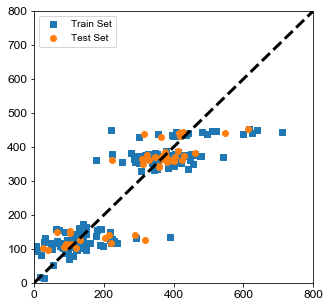

In [457]:
svm=SVR()
params_svr={'kernel':['rbf','linear','poly'],'C':np.logspace(-2,4,10)}
svm_grid=Running_the_Model(svm,params_svr)
plot_fxn(svm_grid)

In [458]:
y_prediction = svm_grid.predict(X_test)

In [459]:
H=pd.DataFrame(data=[y_test.values,y_prediction]).T

In [460]:
H['diff']=np.abs(H[0]-H[1])

## Gaussian Process

In [461]:
from sklearn.gaussian_process.kernels import RBF
gp_reg=GaussianProcessRegressor(n_restarts_optimizer=2)
gp_params={'kernel':[3*RBF()**3,5*RBF(2),RBF(3),2*RBF()**2,RBF()],'alpha':np.logspace(2.5,-10,11)}

RMSE   :  63.31965247789902
MAE     : 49.77689050522808
R²    : 0.8054841552813456


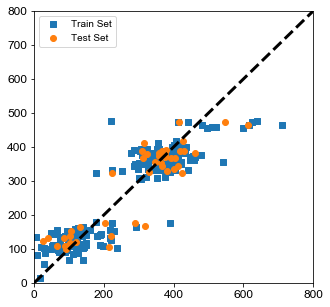

In [462]:
gp_grid=Running_the_Model(gp_reg,gp_params)
plot_fxn(gp_grid)

In [463]:
gp_grid.best_params_

{'alpha': 1.0, 'kernel': RBF(length_scale=1)}

## XGBoost

In [464]:
xgb=XGBRegressor(n_jobs=-1)
xgb_params={'n_estimators':[25,50,100,200],'learning_rate':np.logspace(-5,0,10),
           'max_depth':[5,10,15,20]}

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


RMSE   :  64.27905916755314
MAE     : 52.86230186619249
R²    : 0.7995449686863193


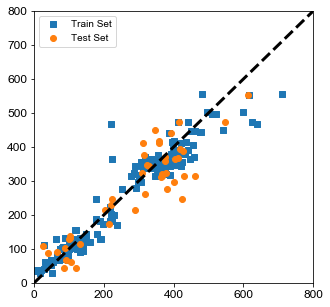

In [465]:
xgb_grid=Running_the_Model(xgb,xgb_params)
plot_fxn(xgb_grid)

In [466]:
xgb_grid.best_params_

{'learning_rate': 0.07742636826811278, 'max_depth': 5, 'n_estimators': 50}

## Random Forest

In [467]:
rf=RandomForestRegressor(n_jobs=-1)
rf_params={'n_estimators':[25,50,75,100,150,200],'max_depth':[10,15,20]}

In [468]:
rf_grid=Running_the_Model(rf,rf_params)

RMSE   :  62.41347478206254
MAE     : 50.33925771092936
R²    : 0.8110118114893492


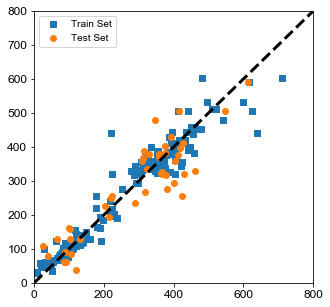

In [469]:
plot_fxn(rf_grid)

In [470]:
rf_grid.best_params_

{'max_depth': 20, 'n_estimators': 50}

In [471]:
from sklearn.model_selection import cross_val_score

# Standardize all X
X_scaled = scaler_x.transform(X_input)

# Obtain cross-validation scores of various regressors
rf_score = cross_val_score(rf_grid, X_scaled, y_input, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
gb_score = cross_val_score(xgb_grid, X_scaled, y_input, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
gp_score = cross_val_score(gp_grid, X_scaled, y_input, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
svr_score = cross_val_score(svm_grid,X_scaled, y_input, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)

                        RMSE   RMSE-Std
RandomForest      102.700593  32.156263
XGBoost           120.259600  38.714510
Gaussian Process   99.786551  34.606374
SVM               117.702305  34.216420


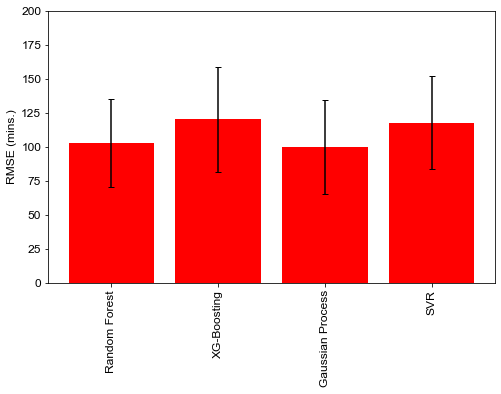

In [487]:
fig,ax = plt.subplots(figsize=(8,5))
model = ['Random Forest', 'XG-Boosting', 'Gaussian Process','SVR']
rmse_scores = [np.mean(np.sqrt(-rf_score)), np.mean(np.sqrt(-gb_score)), np.mean(np.sqrt(-gp_score)),np.mean(np.sqrt(-svr_score))]
std  = [np.std(np.sqrt(-rf_score)), np.std(np.sqrt(-gb_score)), np.std(np.sqrt(-gp_score)),np.std(np.sqrt(-svr_score))]
Results=pd.DataFrame(index=['RandomForest','XGBoost','Gaussian Process','SVM'],columns=['RMSE','RMSE-Std'])
Results['RMSE']=rmse_scores
Results['RMSE-Std']=std
print(Results)
fontsize = 12
ax.bar(model,scores,yerr=std,alpha=1, capsize=3,color='red')
ax.set_ylabel('RMSE (mins.)',fontsize=fontsize)
# ax.set_title('Cross Validation Score',fontsize=fontsize)
plt.xticks(rotation=90)
plt.ylim(0,200)
plt.show()

## SHAP ANALYSIS

In [489]:
import shap

In [562]:
X_new_train=np.array(np.median(X_train,axis=0)).reshape(1,-1)

In [563]:
pd.DataFrame(X_new_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.007012,0.438383,0.476881,0.347717,0.506818,-0.611593,0.611593,-0.122628,-0.876681,0.360231,-0.909925,0.345862,0.111128,0.346896


In [564]:
shap_explain=shap.KernelExplainer(gp_grid.predict,data=X_new_train)

In [565]:
import warnings
warnings.filterwarnings(action='ignore')

X_train=pd.DataFrame(X_train)
X_train.columns=I1.columns

In [566]:
shap_values=shap_explain.shap_values(X_train)

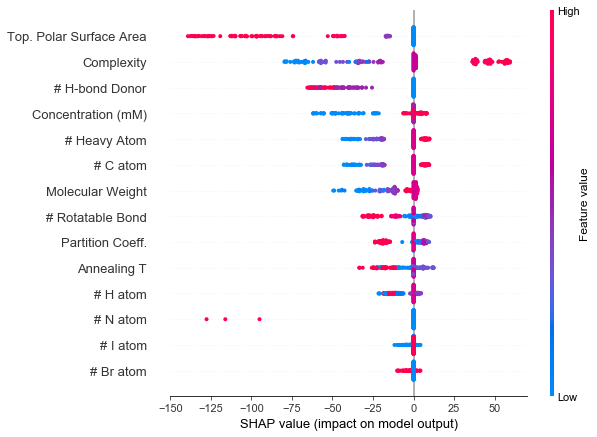

In [567]:
shap.summary_plot(shap_values,X_train)

## SHAP ANALYSIS FOR RF

In [576]:
rf_reg=RandomForestRegressor(**rf_grid.best_params_)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, n_estimators=50)

In [580]:
shap_explain_tree=shap.TreeExplainer(rf_reg,data=X_new_train)

In [581]:
import warnings
warnings.filterwarnings(action='ignore')

In [582]:
shap_values_tree=shap_explain_tree.shap_values(X_train,check_additivity=False)

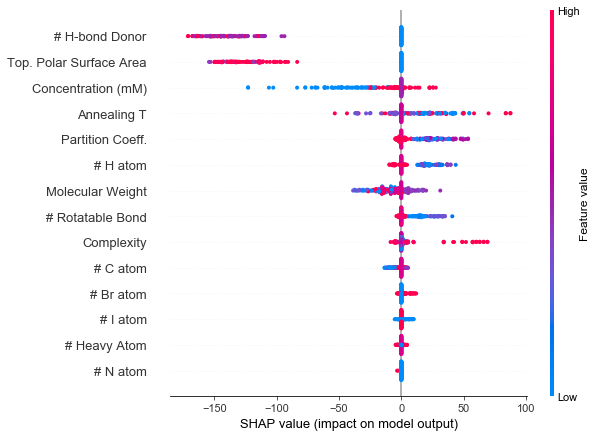

In [583]:
shap.summary_plot(shap_values_tree,X_train)